In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
from IPython import display
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls

--2020-05-23 11:03:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124928 (122K) [application/x-httpd-php]
Saving to: ‘Concrete_Data.xls.1’

Concrete_Data.xls.1 100%[===================>] 122.00K   607KB/s    in 0.2s    

2020-05-23 11:03:14 (607 KB/s) - ‘Concrete_Data.xls.1’ saved [124928/124928]



In [3]:
# 'Sheet1' contains the data
data = pd.ExcelFile('Concrete_Data.xls')
print(data.sheet_names)
df = data.parse('Sheet1')
df.shape

['Sheet1', 'Sheet2', 'Sheet3']


(1030, 9)

In [4]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

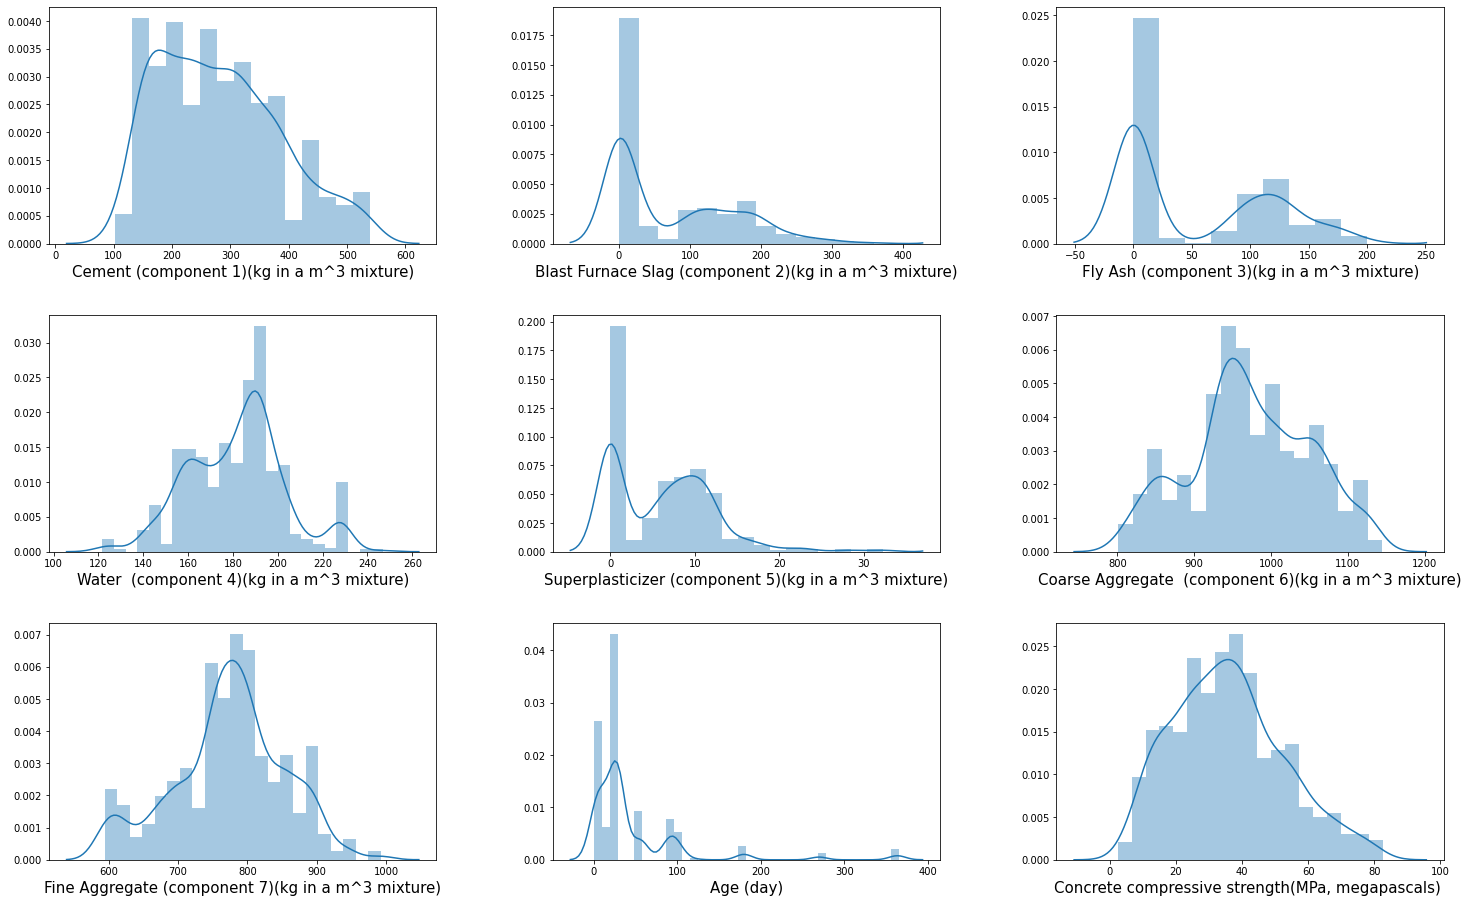

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
fig.subplots_adjust(top=0.8, bottom=0.01, hspace=0.3, wspace=0.3)

columns = df.columns
num_axes = min(len(axes.flatten()), len(columns))

for idx, ax in enumerate(axes.flatten()[:num_axes]):
    sns.distplot(df[columns[idx]], hist=True, ax=ax)
    ax.set_xlabel(columns[idx], fontsize=15, color='black')


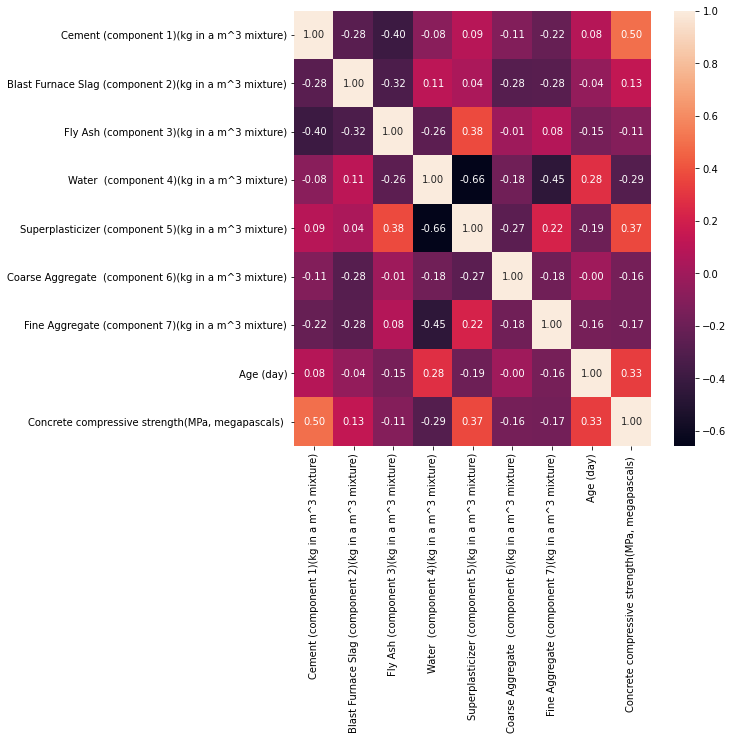

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.shape, df_scaled.shape

((1030, 9), (1030, 9))

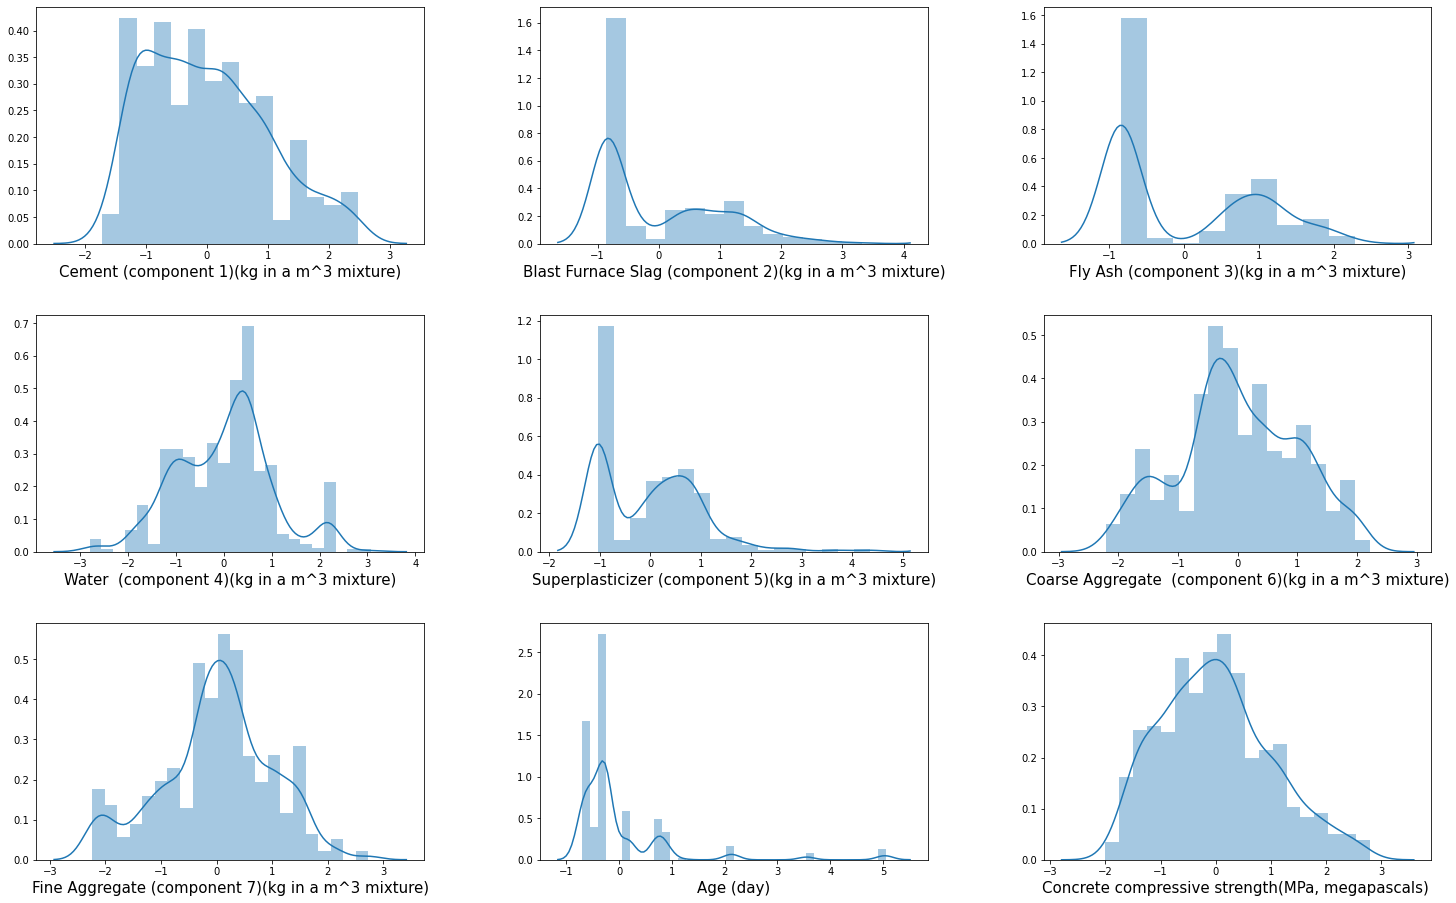

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
fig.subplots_adjust(top=0.8, bottom=0.01, hspace=0.3, wspace=0.3)

columns = df_scaled.columns
num_axes = min(len(axes.flatten()), len(columns))

for idx, ax in enumerate(axes.flatten()[:num_axes]):
    sns.distplot(df_scaled[columns[idx]], hist=True, ax=ax)
    ax.set_xlabel(columns[idx], fontsize=15, color='black')


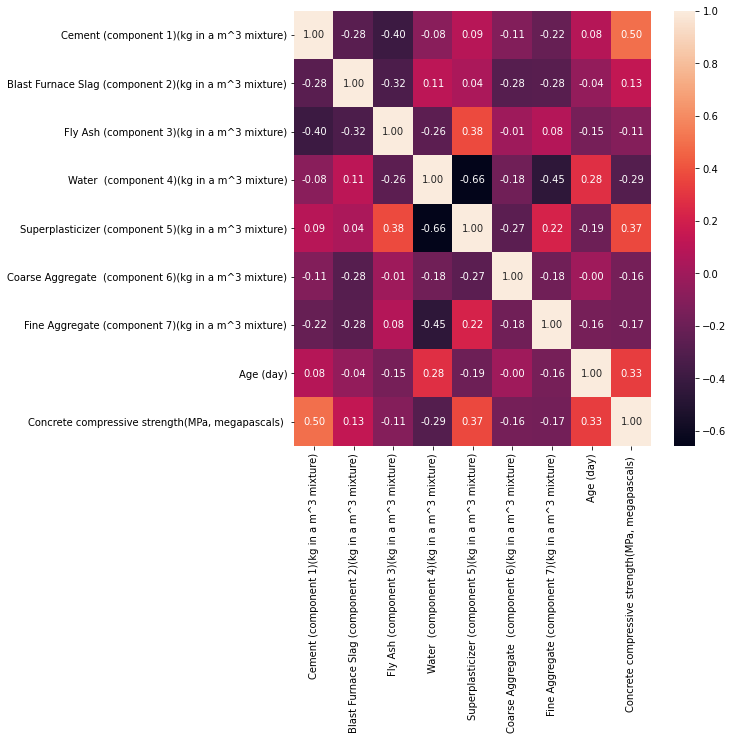

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f')

In [11]:
# the last column 'Concrete compressive strength(MPa, megapascals) ' 
# is the target variable
X, y = df_scaled.iloc[:, :-1], df_scaled.iloc[:, -1]
X.shape, y.shape

((1030, 8), (1030,))

In [0]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

np.random.seed(42)
output_dict = cross_validate(LinearRegression(), X, y, cv=15, scoring='r2', 
               return_train_score=True, return_estimator=True, n_jobs=-1)

In [13]:
pd.DataFrame(output_dict)[['estimator', 'train_score', 'test_score']]

,estimator,train_score,test_score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.652411,-0.782318
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.643133,-0.497967
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.553228,0.711549
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.622683,0.273018
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.622859,0.438299
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.622828,0.398428
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.626652,0.275557
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.618569,0.537184
8,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.624770,-0.926216
9,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.603386,0.477528


In [0]:
pd.DataFrame(output_dict)[['train_score', 'test_score']].to_csv('r_squared_cross_validated_model_result.csv', index=False)